In [1]:
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
import cv2
import scipy.ndimage as nd
import matplotlib.pyplot as plt
#from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature
from skimage import filters as skfl
from skimage.color import rgb2gray
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def showme(image, ax=None, cmap=None):
    if ax is None:
        ax = pl.figure(figsize=(11,11)).add_subplot(111)

    if cmap is None:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap=cmap)
    ax.axis('off')
    

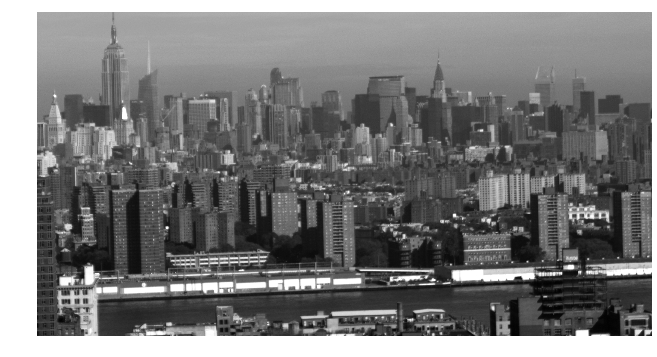

In [3]:
rawimg = np.fromfile("img1.raw", np.uint8)
#rawimg = rawimg.reshape([2160,4096,3])
imgsq = rawimg.astype(float)
imgsq *= 255 / imgsq.max()
img2d = (imgsq.reshape([2160,4096,3]).sum(2) / 3.)
img2d /= img2d.max()
#img2d = img2d.astype(float)
showme(img2d, cmap = 'gray')

In [4]:
smoothImg = nd.filters.gaussian_filter(img2d, [8, 8])
#showme(smoothImg)
#showme((img2d - smoothImg)**2)
#pl.savefig("smoothedDiff.png")

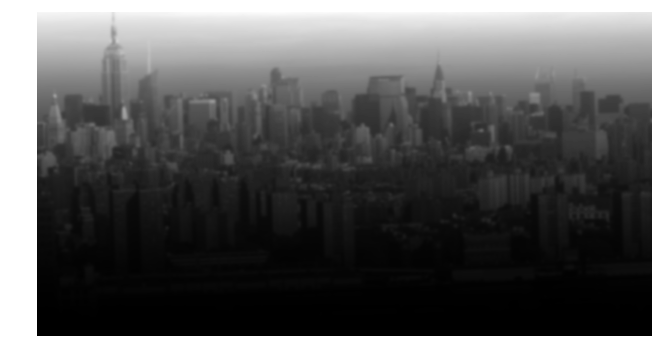

In [5]:
#skfl.sobel?
smoothImgEn = smoothImg[:,:] * (np.atleast_2d(np.linspace(1, 0, smoothImg.shape[0])).T)**2
#imgedge = skfl.sobel(smoothImgEn)
showme(smoothImgEn, cmap = 'gray')
#showme(imgedge, cmap = 'gray')

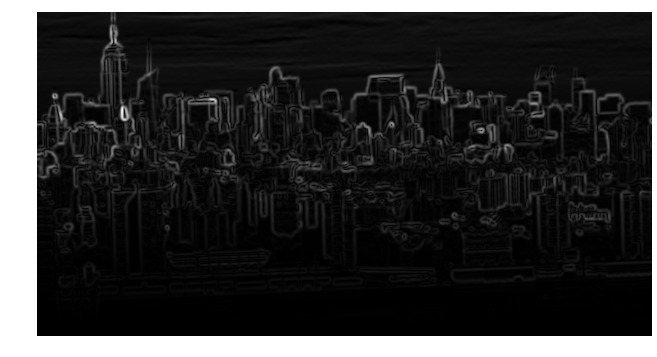

In [6]:
imgedge = skfl.sobel(smoothImgEn)
showme(imgedge, cmap = 'gray')

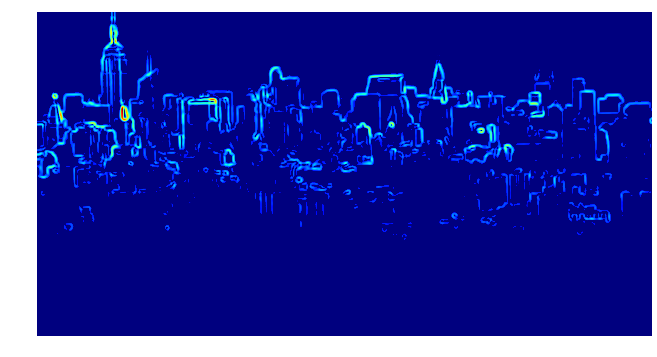

In [7]:
imgedge2 = imgedge.copy()
imgedge2[imgedge < 0.0025] = 0.0
showme(imgedge2)

In [8]:
#yTop = imgedge2.sort(0)
ymax = imgedge2.max(0)

rows = imgedge2.shape[0]
cols = imgedge2.shape[1]
envelope = [np.where(imgedge[:,i] == ymax[i])[0][-1] for i in range(cols)][1:]



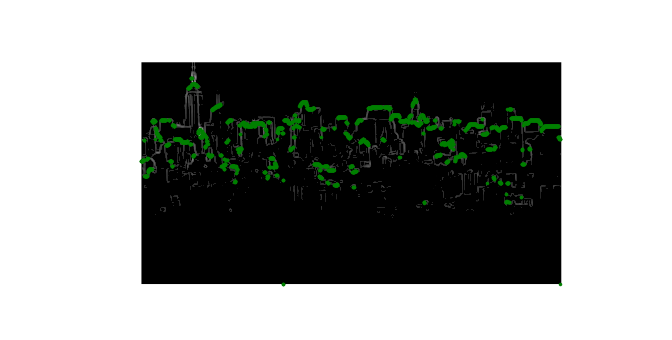

In [9]:
showme(imgedge2, cmap = 'gray')
pl.plot(np.arange(imgedge2.shape[1])[1:], envelope, 'g.')

In [10]:
grad_max = []
for i in range(cols):
    grad = np.gradient(imgedge2[:,i])
    grad_max.append(np.argpartition(grad, -20)[-20:].min())
    

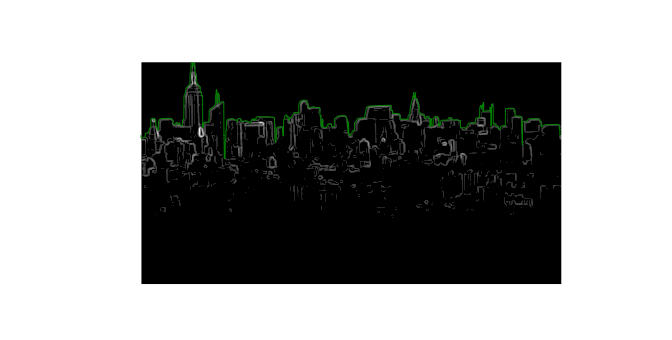

In [11]:
showme(imgedge2, cmap = 'gray')
plt.plot(np.arange(imgedge2.shape[1]), grad_max, 'g-', ms = 1.5)
#plt.axhline(y = threshold)